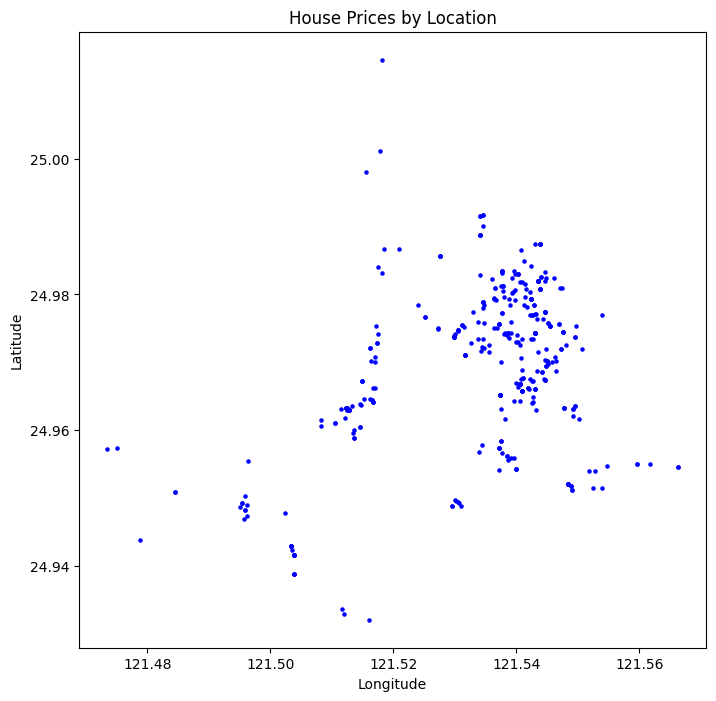

   No  X1 transaction date  X2 house age  \
0   1             2012.917          32.0   
1   2             2012.917          19.5   
2   3             2013.583          13.3   
3   4             2013.500          13.3   
4   5             2012.833           5.0   

   X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                84.87882                               10   
1                               306.59470                                9   
2                               561.98450                                5   
3                               561.98450                                5   
4                               390.56840                                5   

   X5 latitude  X6 longitude  Y house price of unit area  \
0     24.98298     121.54024                        37.9   
1     24.98034     121.53951                        42.2   
2     24.98746     121.54391                        47.3   
3     24.98746     121.543

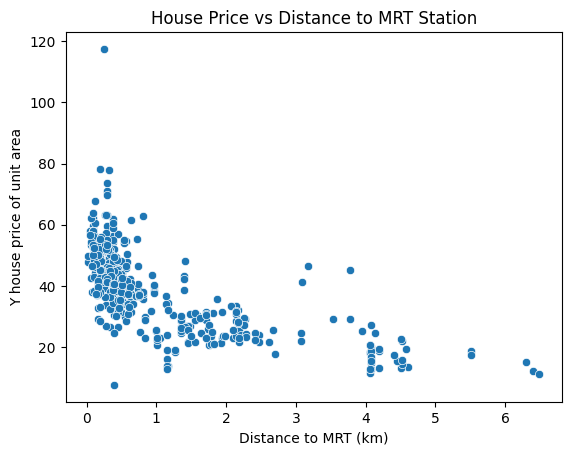

In [1]:
# Import required libraries
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import folium
import matplotlib.pyplot as plt

# Load the data (assuming your dataset is in a CSV file)
# Replace 'your_file.csv' with the actual file name
data = pd.read_csv('Real estate.csv')

# Create a GeoDataFrame
# Define the coordinates (latitude, longitude) for each row
geometry = [Point(lon, lat) for lon, lat in zip(data['X6 longitude'], data['X5 latitude'])]
geo_df = gpd.GeoDataFrame(data, geometry=geometry)

# Set the CRS (Coordinate Reference System) to WGS84 (EPSG:4326) for latitude/longitude
geo_df.set_crs(epsg=4326, inplace=True)

# Plot the locations on a map using folium
# Starting point for the map
map_center = [geo_df['X5 latitude'].mean(), geo_df['X6 longitude'].mean()]

# Create a folium map
m = folium.Map(location=map_center, zoom_start=13)

# Add points to the map
for idx, row in geo_df.iterrows():
    folium.Marker([row['X5 latitude'], row['X6 longitude']],
                  popup=f"House Price: {row['Y house price of unit area']}").add_to(m)

# Save the map to an HTML file
m.save('geospatial_map.html')

# Plot with geopandas and matplotlib
geo_df.plot(marker='o', color='b', markersize=5, figsize=(10, 8))
plt.title('House Prices by Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Calculate the distance to the nearest MRT station
from scipy.spatial import distance

# Create an array with the coordinates of each point (lat, lon)
coords = geo_df[['X5 latitude', 'X6 longitude']].values

# Function to compute the distance to the nearest MRT station (X3 column)
geo_df['Distance to MRT (km)'] = geo_df.apply(lambda row: row['X3 distance to the nearest MRT station'] / 1000, axis=1)

# Show the updated GeoDataFrame
print(geo_df.head())

# Optional: Analyze relationships (e.g., house price vs distance to MRT)
import seaborn as sns
sns.scatterplot(x='Distance to MRT (km)', y='Y house price of unit area', data=geo_df)
plt.title('House Price vs Distance to MRT Station')
plt.show()


In [5]:
# Import required libraries
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import folium

# Load the data (assuming your dataset is in a CSV file)
# Replace 'your_file.csv' with the actual file name
data = pd.read_csv("https://raw.githubusercontent.com/tushuli396/Real-estate-investment/refs/heads/main/data/Real-estate.csv")

# Create a GeoDataFrame
# Define the coordinates (latitude, longitude) for each row
geometry = [Point(lon, lat) for lon, lat in zip(data['X6 longitude'], data['X5 latitude'])]
geo_df = gpd.GeoDataFrame(data, geometry=geometry)

# Set the CRS (Coordinate Reference System) to WGS84 (EPSG:4326) for latitude/longitude
geo_df.set_crs(epsg=4326, inplace=True)

# Plot the locations on a map using folium
# Starting point for the map
map_center = [geo_df['X5 latitude'].mean(), geo_df['X6 longitude'].mean()]

# Create a folium map
m = folium.Map(location=map_center, zoom_start=13)

# Add points to the map with latitude and longitude in the popup
for idx, row in geo_df.iterrows():
    folium.Marker(
        [row['X5 latitude'], row['X6 longitude']],
        popup=f"Latitude: {row['X5 latitude']}, Longitude: {row['X6 longitude']}, House Price: {row['Y house price of unit area']}"
    ).add_to(m)

# Save the map to an HTML file
m.save('geospatial_map_with_lat_lon.html')

# Display the map (for Jupyter Notebooks, you can use this to display it)
m


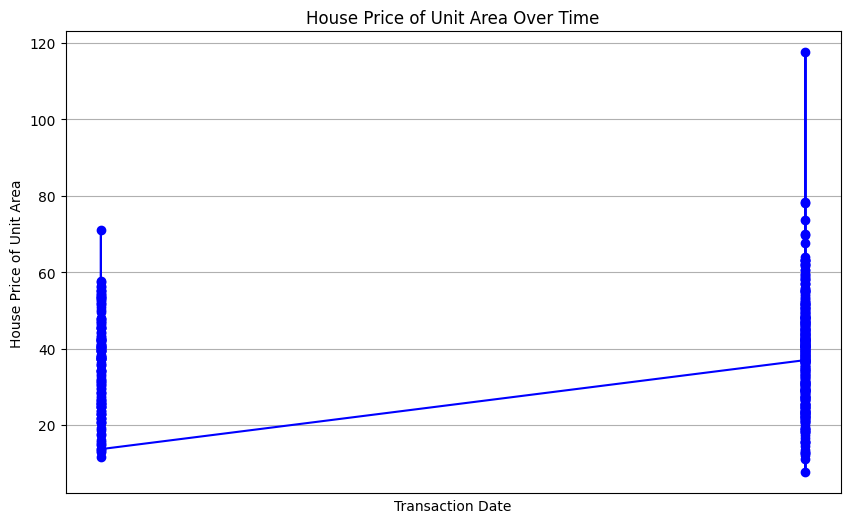

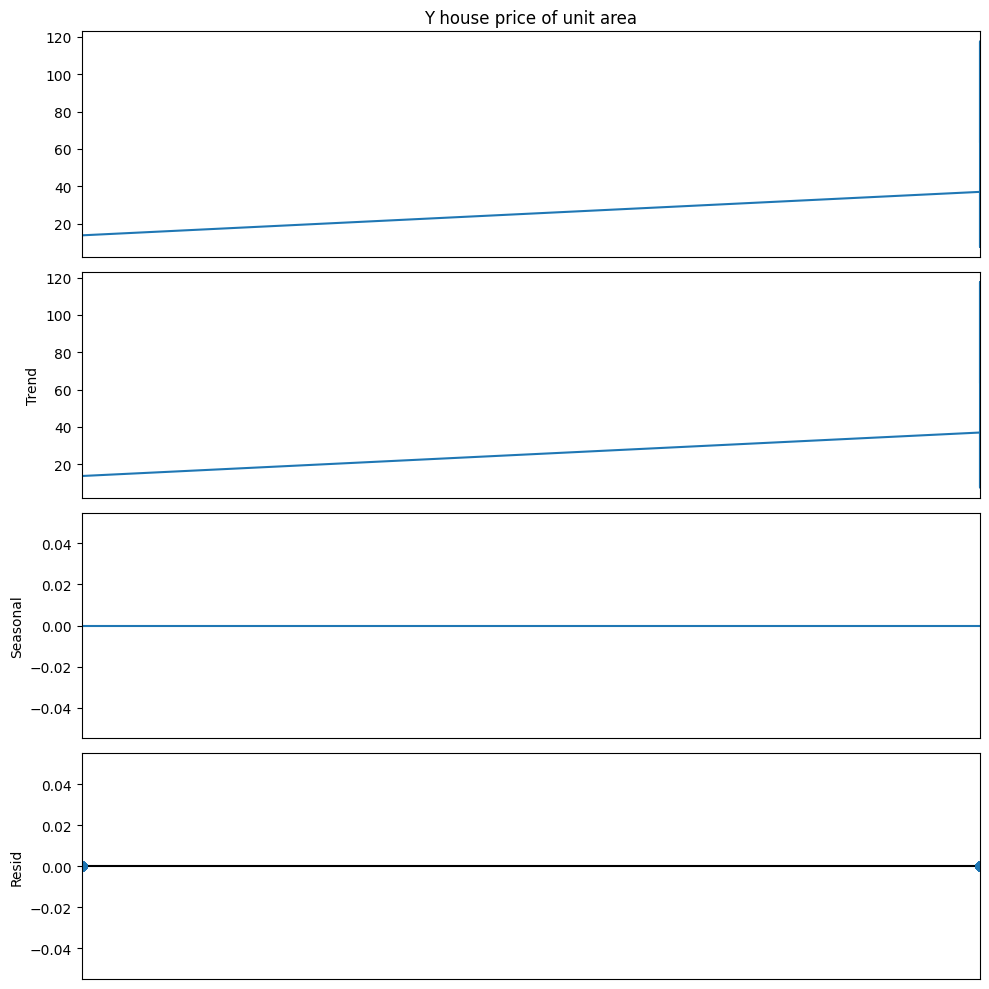

ADF Statistic: -19.806327498324514
p-value: 0.0
The time series is stationary (p <= 0.05)


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

# Load the dataset
df = pd.read_csv('Real estate.csv')

# Strip any leading/trailing spaces from the column names
df.columns = df.columns.str.strip()

# Convert 'X1 transaction date' to a pandas datetime object, inferring the format
df['transaction date'] = pd.to_datetime(df['X1 transaction date'], errors='coerce')

# Drop rows where the 'transaction date' conversion failed (if any)
df.dropna(subset=['transaction date'], inplace=True)

# Sort data by transaction date to ensure correct time series
df.sort_values(by='transaction date', inplace=True)

# Set 'transaction date' as the index
df.set_index('transaction date', inplace=True)

# Plot the house prices over time
plt.figure(figsize=(10,6))
plt.plot(df.index, df['Y house price of unit area'], marker='o', linestyle='-', color='b')
plt.title('House Price of Unit Area Over Time')
plt.xlabel('Transaction Date')
plt.ylabel('House Price of Unit Area')
plt.grid(True)
plt.show()

# Decompose the time series into trend, seasonality, and residuals
decomposition = seasonal_decompose(df['Y house price of unit area'], model='additive', period=1)

# Plot decomposed components
plt.rcParams.update({'figure.figsize': (10, 10)})
decomposition.plot()
plt.show()

# Check for stationarity using the Augmented Dickey-Fuller test (ADF test)
adf_test = adfuller(df['Y house price of unit area'])
print(f'ADF Statistic: {adf_test[0]}')
print(f'p-value: {adf_test[1]}')

if adf_test[1] > 0.05:
    print("The time series is non-stationary (p > 0.05)")
else:
    print("The time series is stationary (p <= 0.05)")



